# EdgeRed Case Study

In [385]:
# Import Libraries

import pandas as pd
import numpy as np
from collections import Counter
from ydata_profiling import ProfileReport
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# Reading Files

clients = pd.read_csv('C:/Users/anity/Desktop/ER Case Study/Clients.csv')
payments = pd.read_csv('C:/Users/anity/Desktop/ER Case Study/Payments.csv')

In [5]:
# Reading file clients

clients.head(5)

,client_id,entity_type,entity_year_established
0,786,Australian Private Company,2002
1,230,Australian Private Company,2008
2,282,Individual/Sole Trader,2001
3,447,Australian Private Company,2013
4,310,Individual/Sole Trader,2015


In [7]:
# Reading file clients

payments.head(5)

,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code
0,20175,927,1,1527012511,66.66,PAYMENT
1,8485,927,1,1511716095,66.66,PAYMENT
2,13778,927,1,1519319303,66.66,PAYMENT
3,22768,927,1,1529863724,66.66,PAYMENT
4,15698,927,1,1521738504,66.66,PAYMENT


In [65]:
# Clients file descriptive analysis
print(clients.describe())
print('========>>>>====================>>>>==================>>>>')
print(clients.nunique())
print('========>>>>====================>>>>==================>>>>')
print(clients.entity_type.unique())

         client_id  entity_year_established
count  1287.000000              1287.000000
mean    641.025641              2009.072261
std     369.778060                 5.708598
min       1.000000              1999.000000
25%     321.500000              2004.000000
50%     640.000000              2010.000000
75%     960.500000              2014.000000
max    1281.000000              2018.000000
========>>>>====================>>>>==================>>>>
client_id                  1281
entity_type                  10
entity_year_established      20
dtype: int64
========>>>>====================>>>>==================>>>>
['Australian Private Company' 'Individual/Sole Trader'
 'Family Partnership' 'Australian Proprietary Company'
 'Discretionary Trading Trust' 'Discretionary Investment Trust'
 'Australian Public Company' 'Other Partnership' 'Fixed Unit Trust'
 'Hybrid Trust']


In [66]:
# Payments file descriptive analysis
print(payments.describe())
print('========>>>>====================>>>>==================>>>>')
print(payments.nunique())
print('========>>>>====================>>>>==================>>>>')
#print(clients.entity_type.unique())

       transaction_id   contract_id     client_id  transaction_date  \
count    25559.000000  25559.000000  25559.000000      2.555900e+04   
mean     12780.000000    758.221409    602.886811      1.517126e+09   
std       7378.392101    352.190207    344.782295      9.964331e+06   
min          1.000000      1.000000      1.000000      1.499019e+09   
25%       6390.500000    510.000000    308.000000      1.508433e+09   
50%      12780.000000    732.000000    593.000000      1.518110e+09   
75%      19169.500000    991.000000    894.000000      1.525976e+09   
max      25559.000000   1643.000000   1281.000000      1.532456e+09   

         payment_amt  
count   25559.000000  
mean     1221.455691  
std      4346.049363  
min      -136.660000  
25%        93.330000  
50%       266.660000  
75%       833.330000  
max    200000.050000  
========>>>>====================>>>>==================>>>>
transaction_id      25559
contract_id          1643
client_id            1281
transaction_date

In [11]:
# Checking for Anomalies in Clients File using Collections library in clients['client_id']

Counter(clients['client_id'])
# Shows Multiple entries for Five Clients and rest of them are unique

Counter({591: 3,
         473: 2,
         165: 2,
         797: 2,
         1262: 2,
         786: 1,
         230: 1,
         282: 1,
         447: 1,
         310: 1,
         539: 1,
         744: 1,
         920: 1,
         1104: 1,
         1187: 1,
         534: 1,
         810: 1,
         678: 1,
         834: 1,
         551: 1,
         97: 1,
         630: 1,
         1042: 1,
         743: 1,
         55: 1,
         535: 1,
         1179: 1,
         242: 1,
         311: 1,
         725: 1,
         510: 1,
         876: 1,
         1272: 1,
         216: 1,
         43: 1,
         571: 1,
         953: 1,
         950: 1,
         452: 1,
         1277: 1,
         831: 1,
         706: 1,
         909: 1,
         829: 1,
         241: 1,
         1143: 1,
         469: 1,
         259: 1,
         410: 1,
         514: 1,
         871: 1,
         1094: 1,
         256: 1,
         975: 1,
         414: 1,
         966: 1,
         941: 1,
         1114: 1,
       

In [38]:
# Overhecking again for Anomalies in Clients File using groupby function in clients['client_id']

clients.groupby('client_id')['client_id'].count().sort_values()

client_id
1       1
858     1
857     1
856     1
855     1
       ..
473     2
1262    2
165     2
797     2
591     3
Name: client_id, Length: 1281, dtype: int64

In [67]:
# Checking for Anomalies in Payments File using Collections library in clients['client_id']

Counter(payments['client_id'])
# Shows Several uneven entries for all the values

Counter({413: 105,
         859: 92,
         1124: 81,
         777: 79,
         591: 78,
         1128: 78,
         726: 77,
         231: 76,
         569: 75,
         718: 75,
         795: 72,
         289: 70,
         283: 68,
         995: 68,
         463: 67,
         1126: 67,
         571: 66,
         93: 65,
         797: 65,
         916: 65,
         1007: 65,
         705: 62,
         969: 62,
         903: 61,
         1080: 61,
         695: 59,
         775: 58,
         1053: 58,
         8: 56,
         190: 56,
         721: 56,
         753: 56,
         208: 55,
         522: 55,
         177: 54,
         786: 54,
         1094: 53,
         25: 52,
         257: 52,
         331: 52,
         792: 52,
         871: 52,
         355: 51,
         808: 51,
         209: 50,
         685: 50,
         958: 50,
         367: 49,
         46: 48,
         56: 48,
         258: 48,
         338: 48,
         678: 48,
         371: 47,
         470: 46,
        

In [69]:
# Overhecking again for Anomalies in payments File using groupby function in clients['client_id']

payments.groupby('client_id')['client_id'].count().sort_values()

client_id
134       1
387       1
1281      2
757       2
762       2
       ... 
1128     78
777      79
1124     81
859      92
413     105
Name: client_id, Length: 1281, dtype: int64

# Now Trying to merge both the files using merge()

In [71]:
payments.merge(clients, on='client_id', how='left')

,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code,entity_type,entity_year_established
0,20175,927,1,1527012511,66.66,PAYMENT,Other Partnership,2006
1,8485,927,1,1511716095,66.66,PAYMENT,Other Partnership,2006
2,13778,927,1,1519319303,66.66,PAYMENT,Other Partnership,2006
3,22768,927,1,1529863724,66.66,PAYMENT,Other Partnership,2006
4,15698,927,1,1521738504,66.66,PAYMENT,Other Partnership,2006
...,...,...,...,...,...,...,...,...
25849,25075,1603,1280,1532023764,1666.68,PAYMENT,Australian Private Company,2016
25850,24711,1603,1280,1531764560,0.01,PAYMENT,Australian Private Company,2016
25851,25076,1603,1280,1532023764,64.99,PAYMENT,Australian Private Company,2016
25852,25132,1627,1281,1532282886,0.01,PAYMENT,Australian Private Company,2012


In [73]:
clients.shape
# Has 1287(rows) x 3(Columns)

(1287, 3)

In [75]:
payments.shape
# Has 25559(Rows) x 6 (Columns)

(25559, 6)

In [86]:
clients.merge(payments, on="client_id", how="right", validate="one_to_many")

MergeError: Merge keys are not unique in left dataset; not a one-to-many merge

# The Above Merge() isn't reverting the exact rows that we need i.e. 25559 Because of multiple entries in clients['client_id'] and payments['client_id']

Hence, checking for exact issues with the data discreption

In [482]:
#clients.groupby(['client_id','entity_type','entity_year_established'])['client_id'].duplicate_values()

In [100]:
clients['client_id'].duplicated().sum()

6

In [106]:
clients.loc[clients['client_id'].duplicated()]

,client_id,entity_type,entity_year_established
306,591,Australian Private Company,2007
350,473,Individual/Sole Trader,2008
816,591,Australian Private Company,2015
1115,165,Individual/Sole Trader,2006
1182,1262,Australian Private Company,2016
1275,797,Australian Private Company,2002


# Shows an issue with anomalies regarding same client_id but changed either in entity type or entity_type_established

While we know we can merge two dataframes based on Validate i.e. 'one_to_many' or 'many_to_many' or 'many_to_one'

In [143]:
clients[clients.client_id.duplicated(keep=False)]
#clients.loc[~clients.client_id.unique()]

,client_id,entity_type,entity_year_established
245,591,Australian Private Company,2013
306,591,Australian Private Company,2007
332,473,Australian Private Company,2016
350,473,Individual/Sole Trader,2008
401,165,Australian Private Company,2015
816,591,Australian Private Company,2015
1063,797,Discretionary Investment Trust,2016
1115,165,Individual/Sole Trader,2006
1172,1262,Australian Private Company,2005
1182,1262,Australian Private Company,2016


# while using the same procedure to workout on payments['client_id']

In [145]:
payments['client_id'].duplicated().sum()

24278

In [148]:
payments['client_id'].duplicated().count()

25559

In [155]:
payments.groupby(['contract_id','transaction_id','client_id'])['client_id'].count()

contract_id  transaction_id  client_id
1            143             248          1
             371             248          1
             798             248          1
             1009            248          1
             1281            248          1
                                         ..
1641         25506           1194         1
1642         25507           37           1
             25508           37           1
1643         25509           299          1
             25510           299          1
Name: client_id, Length: 25559, dtype: int64

In [157]:
payments.loc[payments['client_id'].duplicated()]

,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code
1,8485,927,1,1511716095,66.66,PAYMENT
2,13778,927,1,1519319303,66.66,PAYMENT
3,22768,927,1,1529863724,66.66,PAYMENT
4,15698,927,1,1521738504,66.66,PAYMENT
5,25167,927,1,1532282887,416.67,PAYMENT
...,...,...,...,...,...,...
25552,25385,1608,1279,1532282893,8333.34,PAYMENT
25554,25075,1603,1280,1532023764,1666.68,PAYMENT
25555,24711,1603,1280,1531764560,0.01,PAYMENT
25556,25076,1603,1280,1532023764,64.99,PAYMENT


In [158]:
payments.loc[payments['client_id'].unique()]

,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code
1,8485,927,1,1511716095,66.66,PAYMENT
2,13778,927,1,1519319303,66.66,PAYMENT
3,22768,927,1,1529863724,66.66,PAYMENT
4,15698,927,1,1521738504,66.66,PAYMENT
5,25167,927,1,1532282887,416.67,PAYMENT
...,...,...,...,...,...,...
1277,14316,874,64,1520183306,66.66,PAYMENT
1278,7217,874,64,1509901694,466.67,PAYMENT
1279,12412,874,64,1517764100,66.66,PAYMENT
1280,9480,897,65,1513184897,146.66,PAYMENT


# The Above iteration Shows therea are multiple entries for client_id in payments['client_id'] which actually makes sense because of the several repayments.

Thus there are two approaches that can be done
1. Keeping the first entry of clients['client_id'] valid
2. Another way dropping the entries of duplicated values that has anomalies

Trying the second way of approach this time

In [191]:
clients[clients.client_id.duplicated(keep=False)]

,client_id,entity_type,entity_year_established
245,591,Australian Private Company,2013
306,591,Australian Private Company,2007
332,473,Australian Private Company,2016
350,473,Individual/Sole Trader,2008
401,165,Australian Private Company,2015
816,591,Australian Private Company,2015
1063,797,Discretionary Investment Trust,2016
1115,165,Individual/Sole Trader,2006
1172,1262,Australian Private Company,2005
1182,1262,Australian Private Company,2016


In [200]:
clients.loc[clients['client_id'].duplicated()].client_id.count()

6

In [166]:
q = pd.merge(payments,clients,on='client_id',how='left')
print(q.head(5))
print('==============================\
      *****************\
      ================================')
print(q.shape)

   transaction_id  contract_id  client_id  transaction_date  payment_amt  \
0           20175          927          1        1527012511        66.66   
1            8485          927          1        1511716095        66.66   
2           13778          927          1        1519319303        66.66   
3           22768          927          1        1529863724        66.66   
4           15698          927          1        1521738504        66.66   

  payment_code        entity_type  entity_year_established  
0      PAYMENT  Other Partnership                     2006  
1      PAYMENT  Other Partnership                     2006  
2      PAYMENT  Other Partnership                     2006  
3      PAYMENT  Other Partnership                     2006  
4      PAYMENT  Other Partnership                     2006  
==============================      *****************      ================================
(25854, 8)


In [190]:
q.loc[q['client_id']==591].count()

transaction_id             234
contract_id                234
client_id                  234
transaction_date           234
payment_amt                234
payment_code               234
entity_type                234
entity_year_established    234
dtype: int64

In [208]:
q.loc[q['client_id'].isin([591, 473, 165, 591, 797, 1262])]

,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code,entity_type,entity_year_established
3255,18302,1280,165,1525025311,1716.67,PAYMENT,Australian Private Company,2015
3256,18302,1280,165,1525025311,1716.67,PAYMENT,Individual/Sole Trader,2006
3257,17559,644,165,1524161307,1333.33,PAYMENT,Australian Private Company,2015
3258,17559,644,165,1524161307,1333.33,PAYMENT,Individual/Sole Trader,2006
3259,20525,1280,165,1527444515,1666.67,PAYMENT,Australian Private Company,2015
...,...,...,...,...,...,...,...,...
25779,24547,1584,1262,1531678160,833.34,PAYMENT,Australian Private Company,2016
25780,23825,1439,1262,1530814127,2500.00,PAYMENT,Australian Private Company,2005
25781,23825,1439,1262,1530814127,2500.00,PAYMENT,Australian Private Company,2016
25782,21155,1439,1262,1528222125,0.01,PAYMENT,Australian Private Company,2005


# There are total 512 Rows which has an anomaly with client_id and the following entity_type plus entity_year_established

So removing the duplicated values from the clients['Client_id']

In [219]:
newclients = clients.drop_duplicates('client_id')
print(newclients.head(5))
print('******************************************')
print(newclients.shape)
print(payments.shape)

   client_id                 entity_type  entity_year_established
0        786  Australian Private Company                     2002
1        230  Australian Private Company                     2008
2        282      Individual/Sole Trader                     2001
3        447  Australian Private Company                     2013
4        310      Individual/Sole Trader                     2015
******************************************
(1281, 3)
(25559, 6)


In [218]:
newclients.loc[newclients.client_id.duplicated()].client_id.count()

0

In [225]:
merged = payments.merge(newclients, on='client_id', how='left', validate='many_to_one')
print(merged.head(5))
print('*******************************')
print(merged.shape)

   transaction_id  contract_id  client_id  transaction_date  payment_amt  \
0           20175          927          1        1527012511        66.66   
1            8485          927          1        1511716095        66.66   
2           13778          927          1        1519319303        66.66   
3           22768          927          1        1529863724        66.66   
4           15698          927          1        1521738504        66.66   

  payment_code        entity_type  entity_year_established  
0      PAYMENT  Other Partnership                     2006  
1      PAYMENT  Other Partnership                     2006  
2      PAYMENT  Other Partnership                     2006  
3      PAYMENT  Other Partnership                     2006  
4      PAYMENT  Other Partnership                     2006  
*******************************
(25559, 8)


# Now the two files are merged with exact unique values of client_id that has been validated using validate()

In [227]:
merged.head(5)

,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code,entity_type,entity_year_established
0,20175,927,1,1527012511,66.66,PAYMENT,Other Partnership,2006
1,8485,927,1,1511716095,66.66,PAYMENT,Other Partnership,2006
2,13778,927,1,1519319303,66.66,PAYMENT,Other Partnership,2006
3,22768,927,1,1529863724,66.66,PAYMENT,Other Partnership,2006
4,15698,927,1,1521738504,66.66,PAYMENT,Other Partnership,2006


In [264]:
date = pd.to_datetime(merged['transaction_date'], unit='s')
fdate = date.rename('date')

In [272]:
final = pd.concat([merged, fdate], axis=1)
final

,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code,entity_type,entity_year_established,date
0,20175,927,1,1527012511,66.66,PAYMENT,Other Partnership,2006,2018-05-22 18:08:31
1,8485,927,1,1511716095,66.66,PAYMENT,Other Partnership,2006,2017-11-26 17:08:15
2,13778,927,1,1519319303,66.66,PAYMENT,Other Partnership,2006,2018-02-22 17:08:23
3,22768,927,1,1529863724,66.66,PAYMENT,Other Partnership,2006,2018-06-24 18:08:44
4,15698,927,1,1521738504,66.66,PAYMENT,Other Partnership,2006,2018-03-22 17:08:24
...,...,...,...,...,...,...,...,...,...
25554,25075,1603,1280,1532023764,1666.68,PAYMENT,Australian Private Company,2016,2018-07-19 18:09:24
25555,24711,1603,1280,1531764560,0.01,PAYMENT,Australian Private Company,2016,2018-07-16 18:09:20
25556,25076,1603,1280,1532023764,64.99,PAYMENT,Australian Private Company,2016,2018-07-19 18:09:24
25557,25132,1627,1281,1532282886,0.01,PAYMENT,Australian Private Company,2012,2018-07-22 18:08:06


In [274]:
print(final.shape)
print('*******************************************')
final.describe

(25559, 9)
*******************************************


<bound method NDFrame.describe of        transaction_id  contract_id  client_id  transaction_date  payment_amt  \
0               20175          927          1        1527012511        66.66   
1                8485          927          1        1511716095        66.66   
2               13778          927          1        1519319303        66.66   
3               22768          927          1        1529863724        66.66   
4               15698          927          1        1521738504        66.66   
...               ...          ...        ...               ...          ...   
25554           25075         1603       1280        1532023764      1666.68   
25555           24711         1603       1280        1531764560         0.01   
25556           25076         1603       1280        1532023764        64.99   
25557           25132         1627       1281        1532282886         0.01   
25558           25131         1627       1281        1532282886     20000.05   

     

# The merged file is ready after appending the converted date and removing duplicates

Now, getting insights on the default payments.

Using groupby() method to derive the right answers

# Getting values on entity_year Wise Defaults

In [277]:
final.head(2)

,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code,entity_type,entity_year_established,date
0,20175,927,1,1527012511,66.66,PAYMENT,Other Partnership,2006,2018-05-22 18:08:31
1,8485,927,1,1511716095,66.66,PAYMENT,Other Partnership,2006,2017-11-26 17:08:15


In [280]:
a = final.groupby(['entity_year_established','payment_code'])['payment_code'].count()
b = a.xs('DEFAULT', level='payment_code', axis=0)
b

entity_year_established
1999     45
2000    219
2001     35
2002     25
2003     47
2004     36
2005     48
2006     32
2007    156
2008    101
2009     76
2010     80
2011    125
2012    145
2013    218
2014    295
2015    314
2016    165
2017     52
2018      5
Name: payment_code, dtype: int64

<Axes: title={'center': 'Year Wise Entity defaults'}, xlabel='Total defaults', ylabel='Entity Year Established'>

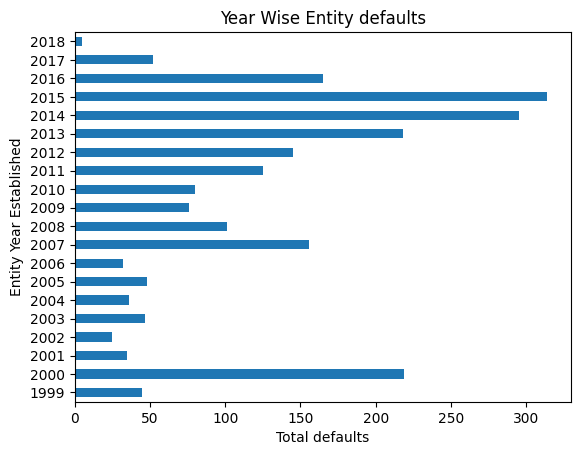

In [286]:
b.plot(kind='barh', title='Year Wise Entity defaults', ylabel='Entity Year Established', xlabel='Total defaults')

# Maximum number of Defaults

In [329]:
final.groupby(['entity_type']).count()

,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code,entity_year_established,date
entity_type,,,,,,,,
Australian Private Company,14827,14827,14827,14827,14827,14827,14827,14827
Australian Proprietary Company,4,4,4,4,4,4,4,4
Australian Public Company,128,128,128,128,128,128,128,128
Discretionary Investment Trust,124,124,124,124,124,124,124,124
Discretionary Trading Trust,187,187,187,187,187,187,187,187
Family Partnership,736,736,736,736,736,736,736,736
Fixed Unit Trust,32,32,32,32,32,32,32,32
Hybrid Trust,32,32,32,32,32,32,32,32
Individual/Sole Trader,9354,9354,9354,9354,9354,9354,9354,9354


In [288]:
c = final.groupby(['entity_type','payment_code'])['payment_code'].count()
d = c.xs('DEFAULT', level='payment_code', axis=0)
d

entity_type
Australian Private Company        1217
Australian Public Company           16
Discretionary Investment Trust      23
Discretionary Trading Trust         21
Family Partnership                  33
Hybrid Trust                         2
Individual/Sole Trader             901
Other Partnership                    6
Name: payment_code, dtype: int64

In [301]:
final.loc[final.payment_code=='DEFAULT'].entity_type.count()

2219

<Axes: title={'center': 'Total Entity defaults'}, xlabel='Total defaults (Two entities has zero defaults)', ylabel='Entity'>

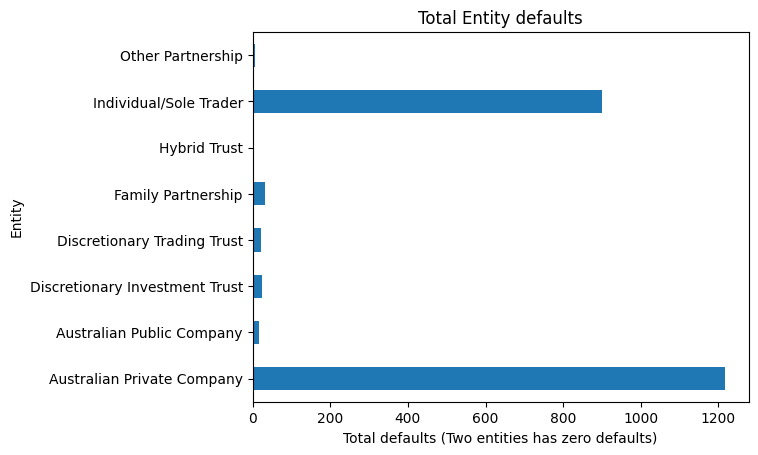

In [323]:
d.plot(kind='barh', title='Total Entity defaults', ylabel='Entity', xlabel='Total defaults \
(Two entities has zero defaults)')

In [346]:
e = final.groupby(['payment_code'])['entity_type'].count()
e

payment_code
DEFAULT     2219
PAYMENT    23340
Name: entity_type, dtype: int64

<Axes: title={'center': 'Overall Defaults to payment'}>

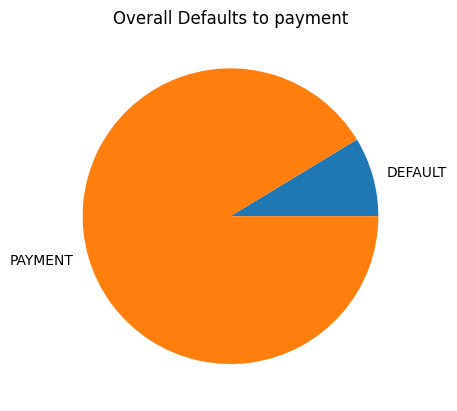

In [350]:
e.plot(kind='pie', title='Overall Defaults to payment', ylabel='')

In [360]:
f = final.groupby(['entity_type','payment_code'])['payment_amt'].mean()
g = f.xs('DEFAULT', level='payment_code', axis=0)
g
#y.xs('Australian Private Company', level='entity_type', axis=0)
#y['entity_type']=='Australian Private Company'

entity_type
Australian Private Company         785.943361
Australian Public Company          485.676250
Discretionary Investment Trust    4946.242174
Discretionary Trading Trust        877.671905
Family Partnership                 341.464848
Hybrid Trust                       450.000000
Individual/Sole Trader             428.108923
Other Partnership                  420.988333
Name: payment_amt, dtype: float64

<Axes: title={'center': 'Average Default Amount'}, xlabel='Average Amount', ylabel='Entity'>

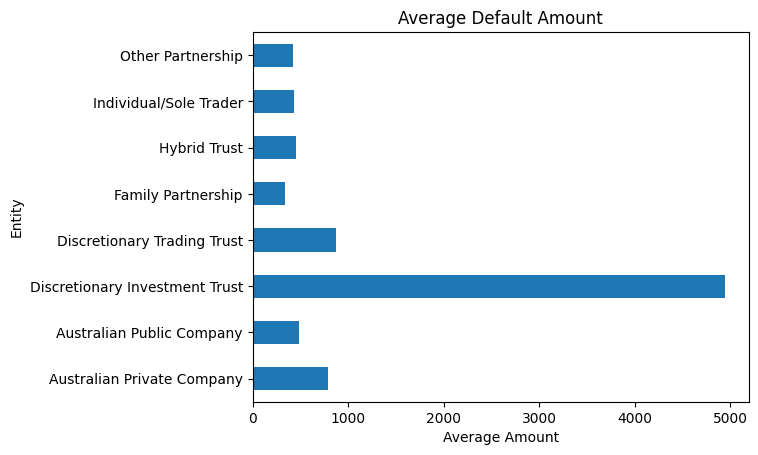

In [367]:
g.plot(kind='barh', title='Average Default Amount', xlabel='Average Amount', ylabel='Entity')

In [377]:
h = final.groupby(['entity_type', 'payment_code','entity_year_established'])['payment_amt'].sum()
i = h.xs('DEFAULT', level='payment_code', axis=0)
i

entity_type                     entity_year_established
Australian Private Company      1999                        21351.07
                                2000                       136985.78
                                2001                        23371.99
                                2002                         1740.00
                                2003                        85910.28
                                2004                         3182.50
                                2005                        19858.31
                                2006                        46166.64
                                2007                        51877.42
                                2008                        22137.73
                                2009                        39768.37
                                2010                        47676.98
                                2011                        70895.67
                                2012           

array([<Axes: title={'center': 'payment_amt'}, xlabel='Payment Amount', ylabel='Entities Year Wise'>],
      dtype=object)

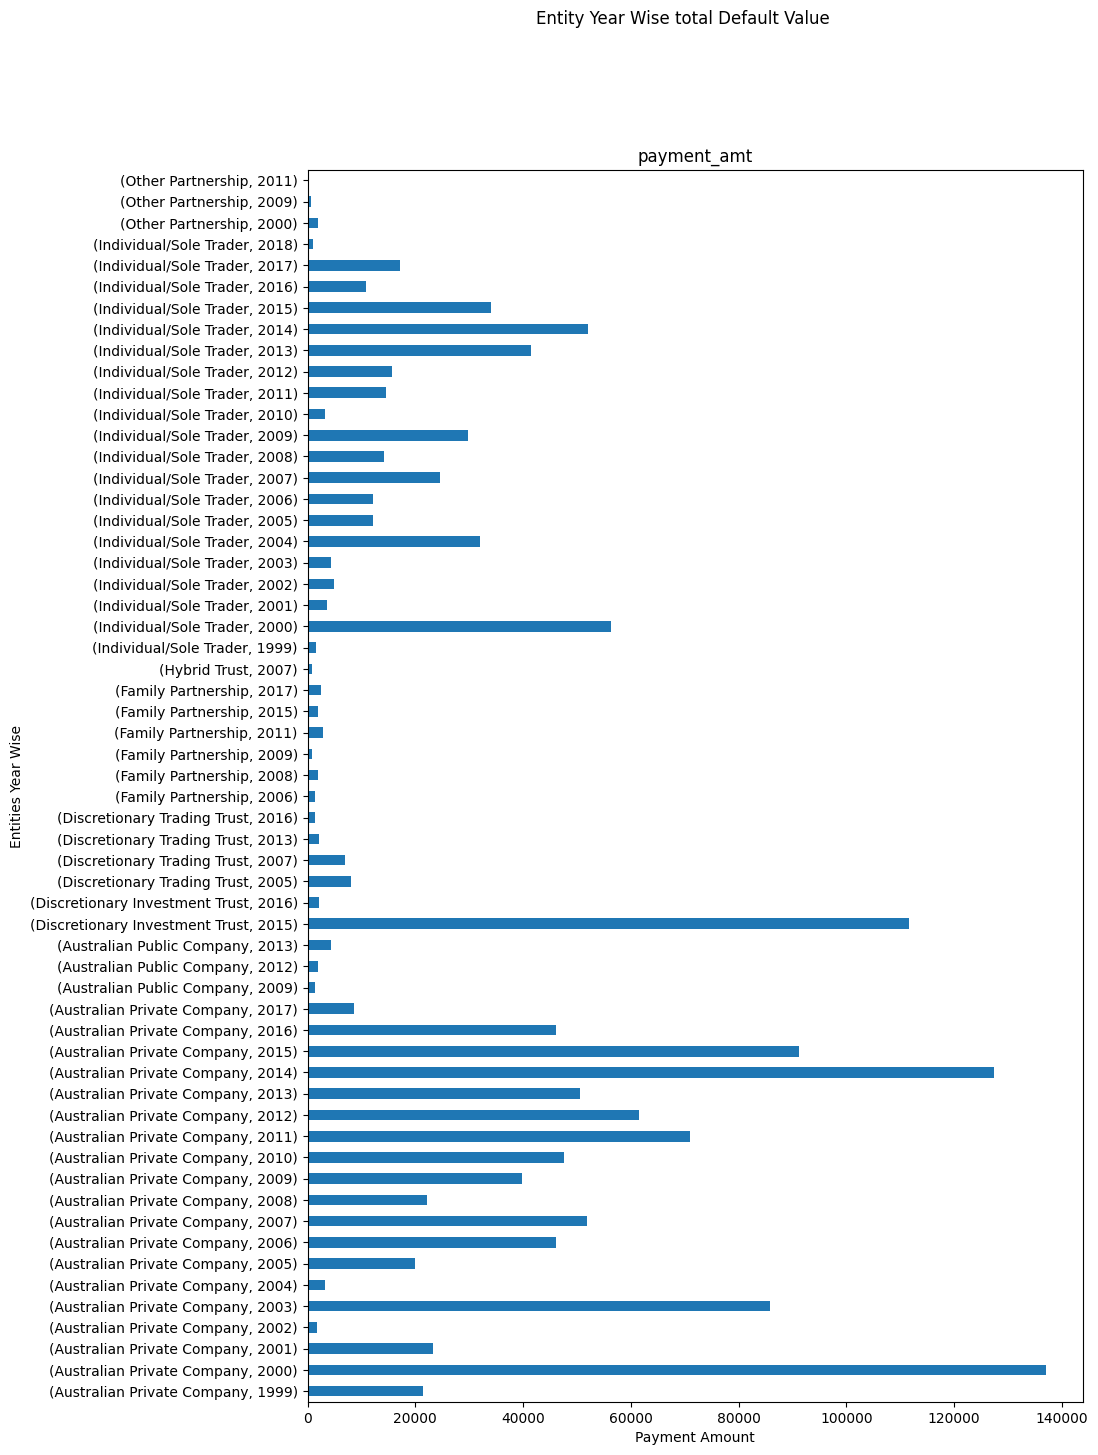

In [412]:
i.plot(kind='barh', subplots=True, figsize=(10,16), title='Entity Year Wise total Default Value', xlabel='Payment Amount', ylabel='Entities Year Wise')

# Entity Grouped by Total Contract_ID and Date

In [431]:
j = final.groupby(['entity_type','payment_code', 'date'])['payment_amt'].sum()
k = j.xs('DEFAULT', level='payment_code', axis=0)
k

entity_type                 date               
Australian Private Company  2017-07-03 18:08:05    2438.39
                            2017-07-04 18:08:07    4748.33
                            2017-07-05 18:08:08    3122.37
                            2017-07-06 18:08:10    5000.00
                            2017-07-10 18:08:14      30.46
                                                    ...   
Individual/Sole Trader      2018-07-24 18:08:08    3193.33
Other Partnership           2017-08-03 18:08:48      27.35
                            2017-08-09 18:08:56     565.26
                            2017-10-26 17:08:13     966.66
                            2017-11-28 17:08:13     966.66
Name: payment_amt, Length: 611, dtype: float64

In [436]:
l = final.groupby(['entity_type'])['payment_code'].count()
#m = l.xs('DEFAULT', level='payment_code', axis=0)
l

entity_type
Australian Private Company        14827
Australian Proprietary Company        4
Australian Public Company           128
Discretionary Investment Trust      124
Discretionary Trading Trust         187
Family Partnership                  736
Fixed Unit Trust                     32
Hybrid Trust                         32
Individual/Sole Trader             9354
Other Partnership                   135
Name: payment_code, dtype: int64

In [461]:
k17 = final[(final['date'] > '2017-01-01 00:00:00') & (final['date'] < '2017-12-31 23:59:59')].payment_amt.sum()
print('Total Sum of payment made during 2017-2018 is =', k17)
k18 = final[(final['date'] > '2018-01-01 00:00:00') & (final['date'] < '2018-12-31 23:59:59')].payment_amt.sum()
print('Total Sum of payment made during 2018-2019 is =', k18)
k19 = final[(final['date'] > '2019-01-01 00:00:00') & (final['date'] < '2019-12-31 23:59:59')].payment_amt.sum()
print('Total Sum of payment made during 2019-2020 is =', k19)
k16 = final[(final['date'] > '2016-01-01 00:00:00') & (final['date'] < '2016-12-31 23:59:59')].payment_amt.sum()
print('Total Sum of payment made during 2016-2017 is =', k16)

Total Sum of payment made during 2017-2018 is = 9337016.69
Total Sum of payment made during 2018-2019 is = 21882169.310000002
Total Sum of payment made during 2019-2020 is = 0.0
Total Sum of payment made during 2016-2017 is = 0.0


entity_type
Australian Private Company        683505.66
Australian Public Company           6333.34
Discretionary Investment Trust    111891.57
Discretionary Trading Trust        15800.64
Family Partnership                  7684.96
Hybrid Trust                         900.00
Individual/Sole Trader            269148.13
Name: payment_amt, dtype: float64


<Axes: title={'center': 'Total Default payments by entities in 2018 - 19'}, xlabel='Default Payment Aggregate', ylabel='Entity'>

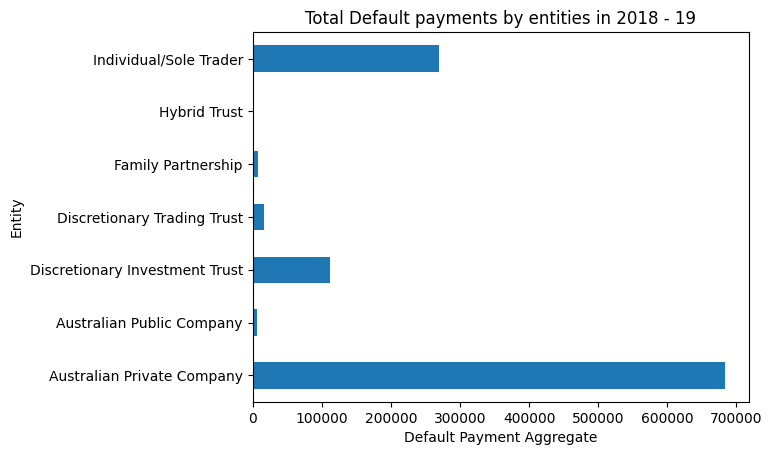

In [472]:
m = final[(final['date'] > '2018-01-01 00:00:00') & (final['date'] < '2018-12-31 23:59:59')]
n = m.groupby(['entity_type','payment_code'])['payment_amt'].sum()
o = n.xs('DEFAULT', level='payment_code', axis=0)
print(o)
o.plot(kind='barh', title='Total Default payments by entities in 2018 - 19', ylabel='Entity', xlabel='Default Payment Aggregate')


entity_type
Australian Private Company        272987.41
Australian Public Company           1437.48
Discretionary Investment Trust      1872.00
Discretionary Trading Trust         2630.47
Family Partnership                  3583.38
Individual/Sole Trader            116578.01
Other Partnership                   2525.93
Name: payment_amt, dtype: float64


<Axes: title={'center': 'Total Default payments by entities in 2017 - 18'}, xlabel='Default Payment Aggregate', ylabel='Entity'>

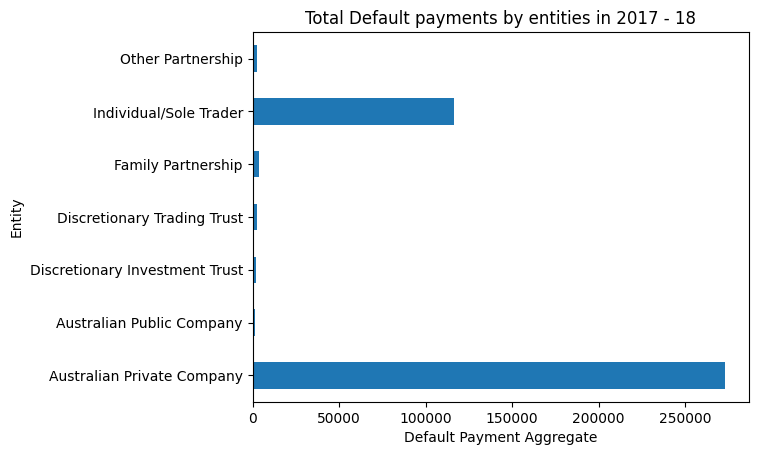

In [473]:
p = final[(final['date'] > '2017-01-01 00:00:00') & (final['date'] < '2017-12-31 23:59:59')]
q = p.groupby(['entity_type','payment_code'])['payment_amt'].sum()
r = q.xs('DEFAULT', level='payment_code', axis=0)
print(r)
r.plot(kind='barh', title='Total Default payments by entities in 2017 - 18', ylabel='Entity', xlabel='Default Payment Aggregate')


In [481]:
print('Total SUM of default payment made in 2018-2019 is =', o.sum())
print('Total SUM of default payment made in 2017-2018 is =', r.sum())
print('Total SUM of default payment made in OVERALL is =', o.sum()+r.sum())

Total SUM of default payment made in 2018-2019 is = 1095264.3
Total SUM of default payment made in 2017-2018 is = 401614.67999999993
Total SUM of default payment made in OVERALL is = 1496878.98


In [485]:
DescriptiveReport = ProfileReport(final)
DescriptiveReport.to_file('FinalER-Report.html')

Export report to file: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 124.58it/s]
